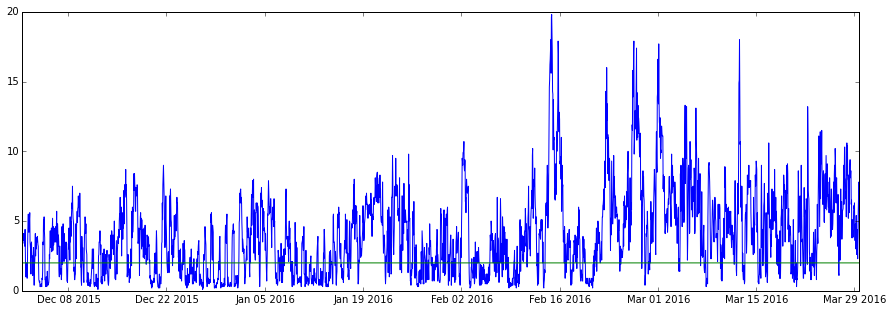

In [197]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import netCDF4
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_start = 10
n_stop = 2872
ff = netCDF4.Dataset('./Test/Data/FORCING_nve.nc', 'r') # Data fra Filefjell 2013
dummy = netCDF4.Dataset('FORCING.nc', 'r') # dummy data set

dates = netCDF4.num2date(nc.variables['time'][n_start:n_stop], nc.variables['time'].units)

# compare ff and dummy
param = 'Wind'
ff_v = ff.variables[param][n_start:n_stop]
d_v = dummy.variables[param][n_start:n_stop]

plt.figure(figsize=(15,5))
plt.plot(dates, ff_v)
plt.plot(dates, d_v)

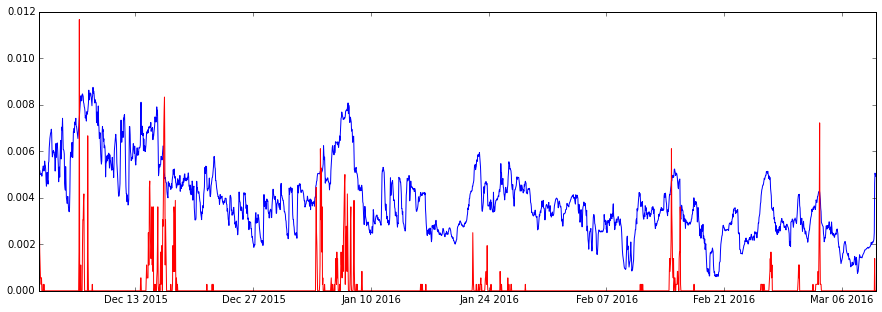

In [170]:
plt.figure(figsize=(15,5))
plt.plot(dates, q_air)
plt.plot(dates, rainf*10., color='red')

2390
Qair [ 0.00061] [ 0.00875]
Rainf [ 0.] [ 0.00116667]


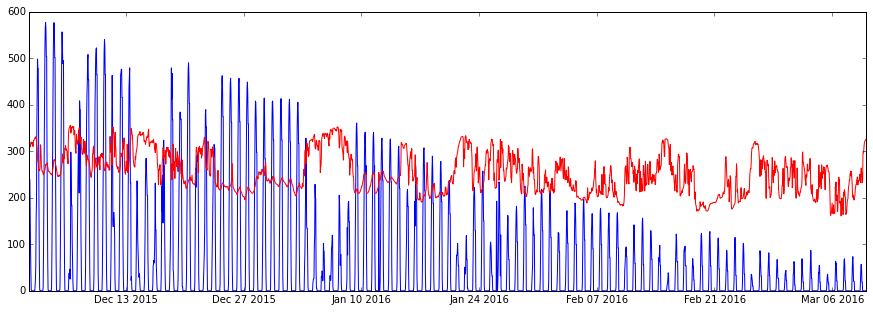

In [171]:
sw_rad = ff.variables['DIR_SWdown'][n_start:n_stop]
lw_rad = ff.variables['LWdown'][n_start:n_stop]
print len(sw_rad)

q_air = ff.variables['Qair'][n_start:n_stop]
print 'Qair', min(q_air), max(q_air)

rainf = ff.variables['Rainf'][n_start:n_stop]
print 'Rainf', min(rainf), max(rainf)

plt.figure(figsize=(15,5))
plt.plot(dates, sw_rad)
plt.plot(dates, lw_rad, color='red')

In [150]:
sw_fft = sp.fftpack.fft(sw_rad)
sw_psd = np.abs(sw_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(sw_psd), 1./24)
i = fftfreq>0

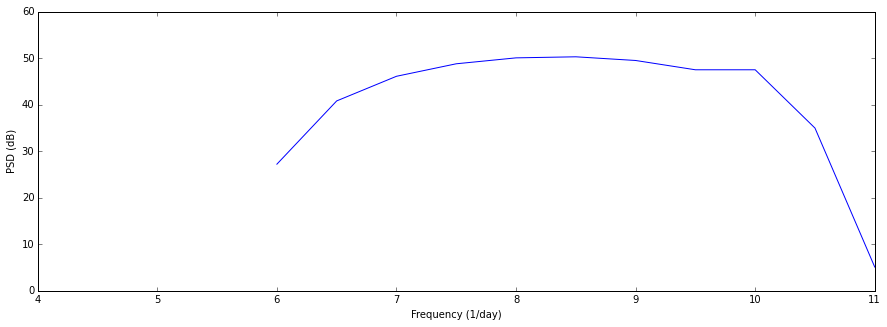

In [77]:
plt.figure(figsize=(15,5));
plt.plot(fftfreq[i], 10*np.log10(sw_psd[i]));
#plt.xlim(0, 5);
plt.xlabel('Frequency (1/day)');
plt.ylabel('PSD (dB)');

In [185]:
n = np.arange(72, dtype=float)
sw_func = ((np.sin(2*np.pi*1/24.*n)+1.)*50.0) * np.exp(n/(max(n))) # W/m2
# Long-wave radiation
lw_amp = 75. # amplitude of the long-wave signal
lw_offset = - (2*np.pi*3./24.) # offset of the daily LW maximum wrt the SW maximum
lw_mean = 275. # LW minimum in W/m2
lw_func = (np.sin(2*np.pi*1/24.*n + lw_offset) * lw_amp) + lw_mean # W/m2

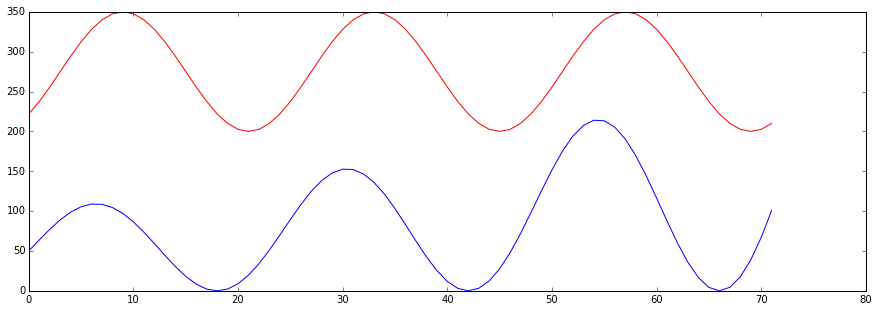

In [186]:
plt.figure(figsize=(15,5));
plt.plot(n, sw_func)
plt.plot(n, lw_func, color='red')